In [1]:
using Primes
using PyPlot
using AMD

In [2]:
function initialize(n, pₙ)
    d = primes(pₙ)
    Aₙ = spdiagm(d, 0)
    e = ones(n, 1)

    for k in 2.^( 0:floor(Int,log2(n)))
        eₖ = e[1:(n-k)]
        Aₙ = Aₙ + spdiagm( [eₖ,eₖ], [-k k])       
    end
    
    Aₙ
end

n = 2000 #20000
pₙ = 17389 #224737

Aₙ = initialize(n, pₙ)
b = zeros(n); b[1] = 1


1

In [6]:
function solve_chol_AMD(A,b) #Julia Interne Aprox Minimal Degree Permutation
    F = cholfact(A)
    x = F \ b
    return x[1]
end

solve_chol_AMD (generic function with 1 method)

Any, Any) in module Main at In[3]:2 overwritten at In[6]:2.


In [3]:
A = convert(SparseMatrixCSC{Float64,Clong}, Aₙ)
@time p = amd(A)
p = convert(Array{Int64,1}, p)
@time F = cholfact(Aₙ, perm=p)
L = sparse(F[:L])
@time  F \ b;


  0.064437 seconds (33.52 k allocations: 2.326 MB)
  0.609169 seconds (179.18 k allocations: 32.051 MB, 0.93% gc time)
  0.082114 seconds (56.20 k allocations: 2.311 MB)


Permuted Matrix AₙNon zero entries: 

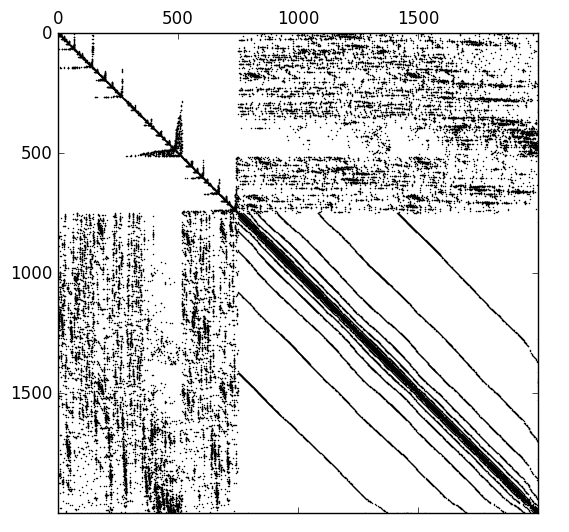

In [18]:
print("Permuted Matrix Aₙ")
spy(Aₙ[p,p], markersize = 0.5) 
print("Non zero entries: ", nnz(Aₙ)/length(full(Aₙ))*100, "%") 

L-Matrix of the Cholesky Factorisation

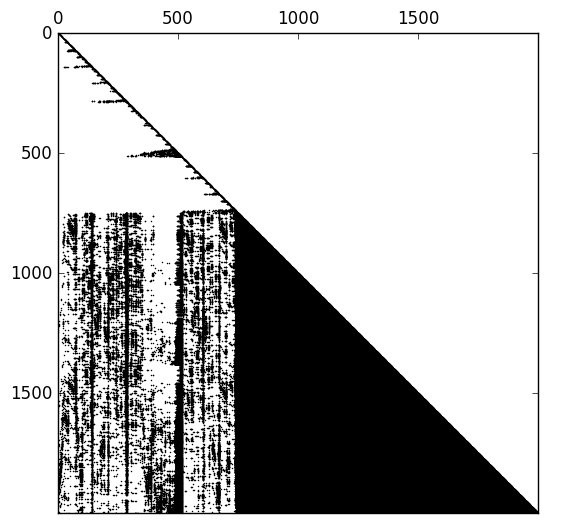

Density of the lower half: 49.39715%

In [20]:
print("L-Matrix of the Cholesky Factorisation")
spy(L, markersize = 0.5) 
print("Density of the lower half: ", 2*nnz(L)/length(full(L))*100, "%") 

##### Comparison without permutation

In [3]:
Fₒ = cholfact(Aₙ, perm=1:size(Aₙ,1))
pₒ = Fₒ[:p]
Lₒ = sparse(Fₒ[:L]);

L-Matrix of the non permuted Cholesky FactorisationDensity of the lower half: 

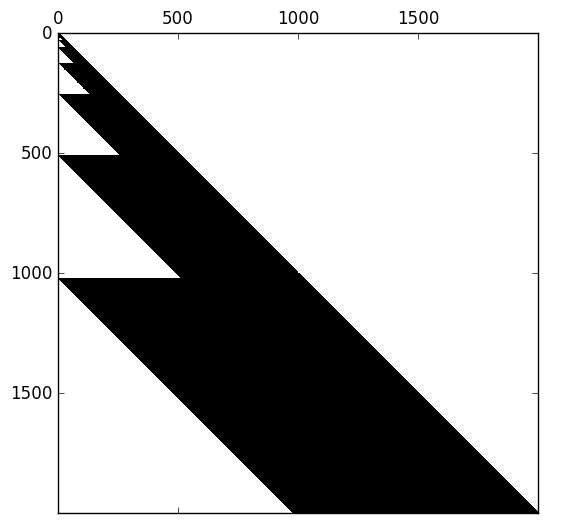

71.4939%

In [22]:
print("L-Matrix of the non permuted Cholesky Factorisation")
spy(Lₒ)
print("Density of the lower half: ", 2*nnz(Lₒ)/length(full(Lₒ))*100, "%") 

In [7]:
c = unsafe_load(F.p)
s = 0
for i = 1:c.nsuper
    k1 = unsafe_load(c.super, i)
    k2 = unsafe_load(c.super, i+1)
    psi = unsafe_load(c.pi, i)
    psend = unsafe_load(c.pi, i+1)
    nsrow = psend - psi
    nscol = k2 - k1
    s += nsrow * nscol
    println(nsrow, " ", nscol)
end
println(c.nsuper, " ",  s)

20 1
20 1
20 1
20 1
20 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
21 1
22 1
22 1
22 1
22 1
39 2
39 2
20 1
22 1
22 1
155 12
38 2
38 2
38 2
38 2
38 2
21 1
38 2
38 2
38 2
19 1
393 16
22 1
22 1
22 1
21 1
22 1
22 1
22 1
22 1
22 1
245 16
39 2
110 7
39 2
22 1
128 9
22 1
22 1
22 1
38 2
826 16
133 9
141 11
160 13
21 1
21 1
21 1
21 1
21 1
148 12
22 1
541 16
22 1
54 3
54 3
54 3
22 1
14 1
22 1
54 3
38 2
21 1
290 16
39 2
110 7
134 9
39 2
96 6
16 1
21 1
847 16
21 1
222 16
21 1
39 2
22 1
235 16
133 9
134 9
21 1
110 7
21 1
22 1
22 1
22 1
22 1
22 1
22 1
17 1
21 1
21 1
21 1
39 2
19 1
20 1
20 1
20 1
20 1
20 1
20 1
278 16
154 12
18 1
20 1
22 1
20 1
22 1
20 1
22 1
20 1
21 1
18 1
19 1
20 1
21 1
17 1
182 16
20 1
20 1
21 1
22 1
18 1
20 1
22 1
102 9
22 1
22 1
22 1
19 1
165 16
18 1
20 1
22 1
19 1
21 1
70 7
84 8
668 16
1010 15
38 2
38 2
22 1
22 1
39 2
39 2
110 7
22 1
22 1
39 2
39 2
39 2
20 1
257 16
22 1
22 1
22 1
22 1
39 2
22 1
21 1
22 1
210 16
20 1
22 1
22 1
22 1
22 1
22 1
22 1
630 16
21 1
22 1
21